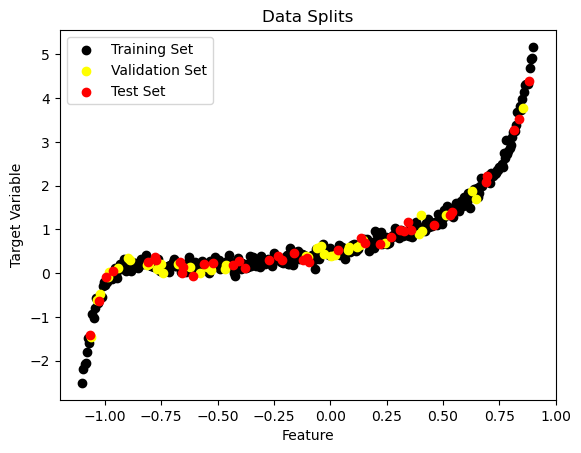

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys


data_path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'linreg.csv'))

data = np.genfromtxt(data_path, delimiter=',', skip_header=1)

def shuffle_and_split_data(data):
    np.random.shuffle(data)

    train_size = int(0.8 * len(data))
    val_size = int(0.1 * len(data))
    test_size = len(data) - train_size - val_size

    X_train, y_train = data[:train_size, 0], data[:train_size, 1]
    X_val, y_val = data[train_size:train_size + val_size, 0], data[train_size:train_size + val_size, 1]
    X_test, y_test = data[train_size + val_size:, 0], data[train_size + val_size:, 1]
    
    return X_train, X_test, X_val, y_train, y_test, y_val

X_train,X_test,X_val,y_train,y_test,y_val = shuffle_and_split_data(data)

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# PLOT
plt.scatter(X_train, y_train, label='Training Set', color='black')
plt.scatter(X_val, y_val, label='Validation Set', color='yellow')
plt.scatter(X_test, y_test, label='Test Set', color='red')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Data Splits')
plt.legend()
plt.show()


In [2]:
import numpy as np
from models.linear_regression.linear_regression import LinearRegression
lr = LinearRegression(learning_rate=0.01, lamda=0.1)

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
y_pred_test = lr.predict(X_test)

print("Train MSE:", lr.mse(y_train, y_pred_train))
print("Train Std Dev:", lr.std_dev(y_train, y_pred_train))
print("Train Variance:", lr.variance(y_train, y_pred_train))
print(' ')
print("Val MSE:", lr.mse(y_val, y_pred_val))
print("Val Std Dev:", lr.std_dev(y_val, y_pred_val))
print("Val Variance:", lr.variance(y_val, y_pred_val))
print(' ')
print("Test MSE:", lr.mse(y_test, y_pred_test))
print("Test Std Dev:", lr.std_dev(y_test, y_pred_test))
print("Test Variance:", lr.variance(y_test, y_pred_test))


Early stopping at iteration 535
Train MSE: 0.37220806135345114
Train Std Dev: 0.6100835246955558
Train Variance: 0.3722019071049529
 
Val MSE: 0.2849436721565521
Val Std Dev: 0.5270072333145482
Val Variance: 0.27773662396585463
 
Test MSE: 0.24415388280820988
Test Std Dev: 0.48373690027035116
Test Variance: 0.23400138868316764


Early stopping at iteration 535


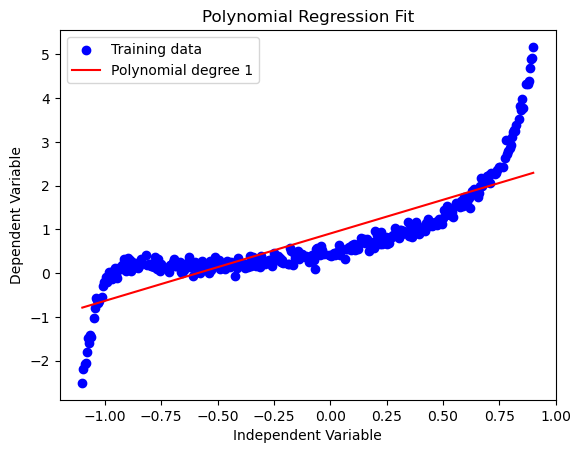

In [3]:
degree = 1
model = LinearRegression(degree=degree, learning_rate=0.01, max_iter=10000)  
model.fit(X_train, y_train)  
  
X_fit = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)  
y_fit = model.predict(X_fit)  
  
plt.scatter(X_train, y_train, color='blue', label='Training data')  
plt.plot(X_fit, y_fit, color='red', label=f'Polynomial degree {degree}')  
plt.xlabel('Independent Variable')  
plt.ylabel('Dependent Variable')  
plt.title('Polynomial Regression Fit')  
plt.legend()  
plt.show()

In [4]:
degrees = np.linspace(1, 20, 20).astype(int)
print(degrees)
results = {}

for k in degrees:
    model = LinearRegression(degree=k, learning_rate=0.01, max_iter=10000)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_mse = model.mse(y_train, y_pred_train)
    test_mse = model.mse(y_test, y_pred_test)
    
    train_std_dev = model.std_dev(y_train, y_pred_train)
    test_std_dev = model.std_dev(y_test, y_pred_test)
    
    train_variance = model.variance(y_train, y_pred_train)
    test_variance = model.variance(y_test, y_pred_test)
    
    print(f"Degree {k}:")
    print(f"Train MSE: {train_mse}, Train Std Dev: {train_std_dev}, Train Variance: {train_variance}")
    print(f"Test MSE: {test_mse}, Test Std Dev: {test_std_dev}, Test Variance: {test_variance}\n")
    
    results[k] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_std_dev': train_std_dev,
        'test_std_dev': test_std_dev,
        'train_variance': train_variance,
        'test_variance': test_variance
    }
best_k = min(results, key=lambda k: results[k]['test_mse'])
print(f"Best degree (k) with minimum test MSE: {best_k}")

weights_file_path = 'best_model_weights.txt'
best_model = LinearRegression(degree=best_k, learning_rate=0.01, max_iter=10000)
best_model.fit(X_train, y_train)

np.savetxt(weights_file_path, best_model.get_weights())
print(f"Best model weights saved to {weights_file_path}")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Early stopping at iteration 535
Degree 1:
Train MSE: 0.37220806135345114, Train Std Dev: 0.6100835246955558, Train Variance: 0.3722019071049529
Test MSE: 0.24415388280820988, Test Std Dev: 0.48373690027035116, Test Variance: 0.23400138868316764

Early stopping at iteration 1195
Degree 2:
Train MSE: 0.25514672640615477, Train Std Dev: 0.5050952072795986, Train Variance: 0.25512116841682064
Test MSE: 0.11112360654351187, Test Std Dev: 0.3325072878529625, Test Variance: 0.11056109647533288

Early stopping at iteration 2981
Degree 3:
Train MSE: 0.09670601750133798, Train Std Dev: 0.3109731107300189, Train Variance: 0.09670427559710457
Test MSE: 0.040625864834147894, Test Std Dev: 0.2015358948902556, Test Variance: 0.04061671692921616

Early stopping at iteration 3099
Degree 4:
Train MSE: 0.09677986313085353, Train Std Dev: 0.3110915969549621, Train Variance: 0.09677798169598857
Test MSE: 0.03844412634726112, Test Std Dev: 0.1959

In [5]:
weights_file_path = 'best_model_weights.txt'
loaded_weights = np.loadtxt(weights_file_path)
loaded_model = LinearRegression(degree=best_k, learning_rate=0.01, max_iter=10000)
loaded_model.weights = loaded_weights
y_pred_test = loaded_model.predict(X_test)

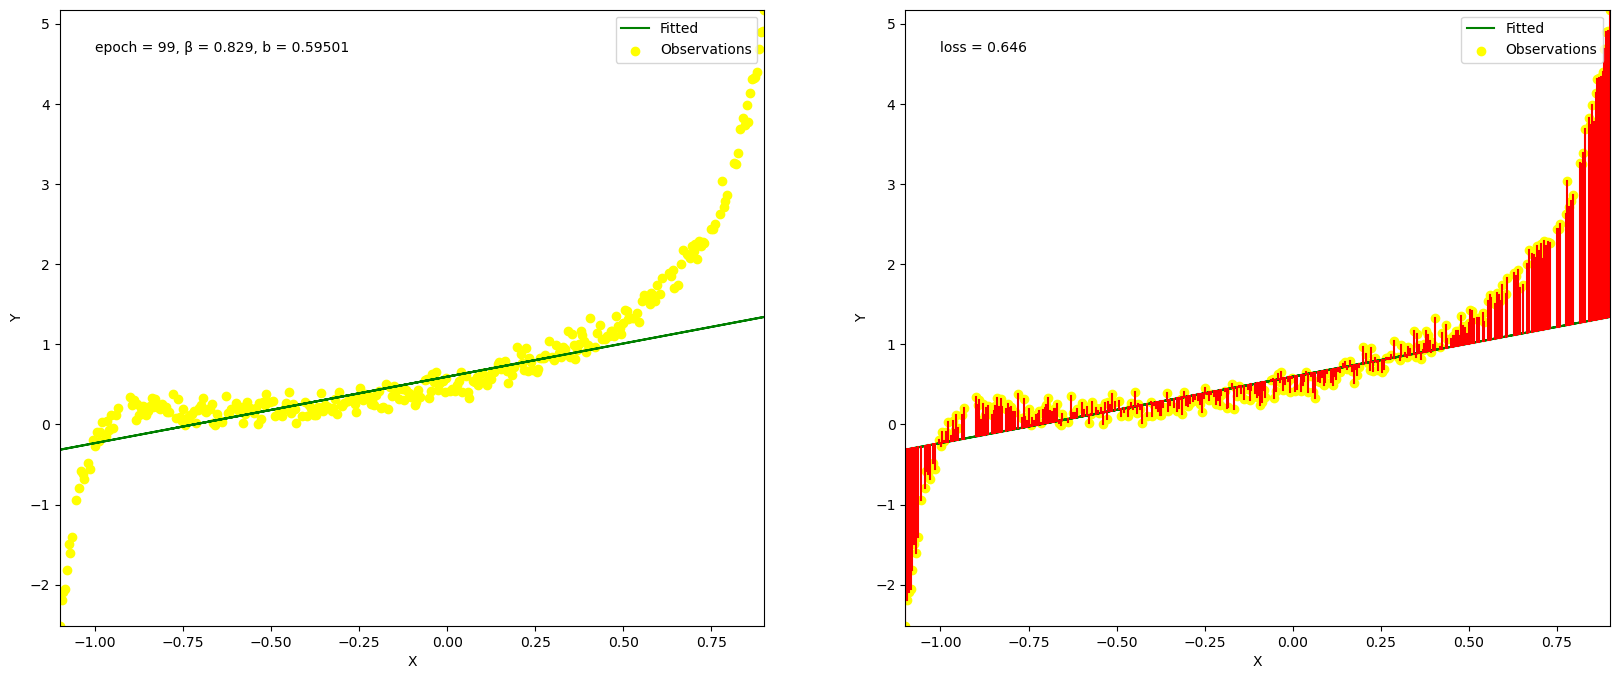

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

class ForAnimation:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        for epoch in range(self.max_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute loss
            loss = np.mean((y - y_pred)**2)
            
            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Save history
            self.history.append({
                'epoch': epoch,
                'weights': self.weights.copy(),
                'bias': self.bias,
                'loss': loss
            })

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def create_animation(X, y, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    line1, = ax1.plot([], [], 'green', label='Fitted')
    scatter1 = ax1.scatter(X, y, color='yellow', label='Observations')
    
    line2, = ax2.plot([], [], 'green', label='Fitted')
    scatter2 = ax2.scatter(X, y, color='yellow', label='Observations')
    residual_lines = [ax2.plot([], [], 'r-')[0] for _ in range(len(X))]
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    
    ax1.legend()
    ax2.legend()
    
    text1 = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, verticalalignment='top')
    text2 = ax2.text(0.05, 0.95, '', transform=ax2.transAxes, verticalalignment='top')

    def init():
        ax1.set_xlim(X.min(), X.max())
        ax1.set_ylim(y.min(), y.max())
        ax2.set_xlim(X.min(), X.max())
        ax2.set_ylim(y.min(), y.max())
        return line1, line2, scatter1, scatter2, text1, text2, *residual_lines

    def update(frame):
        weights = model.history[frame]['weights']
        bias = model.history[frame]['bias']
        epoch = model.history[frame]['epoch']
        loss = model.history[frame]['loss']
        
        y_pred = np.dot(X, weights) + bias
        
        line1.set_data(X.flatten(), y_pred)
        line2.set_data(X.flatten(), y_pred)
        
        text1.set_text(f'epoch = {epoch}, β = {weights[0]:.3f}, b = {bias:.5f}')
        text2.set_text(f'loss = {loss:.3f}')
        
        for i, residual_line in enumerate(residual_lines):
            residual_line.set_data([X[i], X[i]], [y[i], y_pred[i]])
        
        return line1, line2, scatter1, scatter2, text1, text2, *residual_lines

    anim = FuncAnimation(fig, update, frames=len(model.history), init_func=init, blit=True)
    return anim

data_path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'linreg.csv'))

data = np.genfromtxt(data_path, delimiter=',', skip_header=1)

def shuffle_and_split_data(data):
    np.random.shuffle(data)

    train_size = int(0.8 * len(data))
    val_size = int(0.1 * len(data))
    test_size = len(data) - train_size - val_size

    X_train, y_train = data[:train_size, 0], data[:train_size, 1]
    X_val, y_val = data[train_size:train_size + val_size, 0], data[train_size:train_size + val_size, 1]
    X_test, y_test = data[train_size + val_size:, 0], data[train_size + val_size:, 1]
    
    return X_train, X_test, X_val, y_train, y_test, y_val

X_train,X_test,X_val,y_train,y_test,y_val = shuffle_and_split_data(data)

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model = ForAnimation(learning_rate=0.01, max_iter=100)
model.fit(X_train, y_train)

anim = create_animation(X_train, y_train, model)
anim.save('figures/linear_regression_animation.gif', writer=PillowWriter(fps=10))


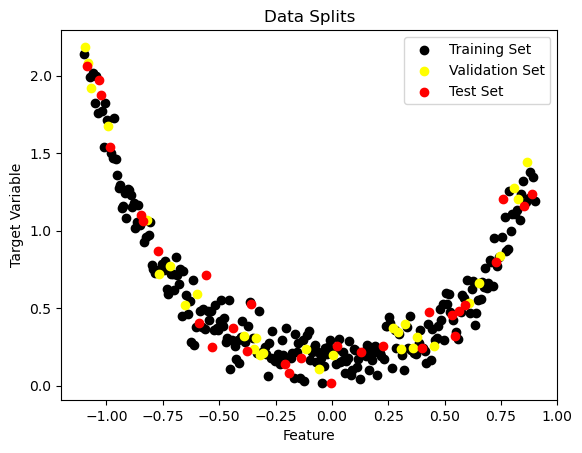

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'regularisation.csv'))

data = np.genfromtxt(data_path, delimiter=',', skip_header=1)

def shuffle_and_split_data(data):
    np.random.shuffle(data)

    train_size = int(0.8 * len(data))
    val_size = int(0.1 * len(data))
    test_size = len(data) - train_size - val_size

    X_train, y_train = data[:train_size, 0], data[:train_size, 1]
    X_val, y_val = data[train_size:train_size + val_size, 0], data[train_size:train_size + val_size, 1]
    X_test, y_test = data[len(data) - test_size:, 0], data[len(data) - test_size:, 1]
    
    return X_train, X_test, X_val, y_train, y_test, y_val

X_train,X_test,X_val,y_train,y_test,y_val = shuffle_and_split_data(data)

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# PLOT
plt.scatter(X_train, y_train, label='Training Set', color='black')
plt.scatter(X_val, y_val, label='Validation Set', color='yellow')
plt.scatter(X_test, y_test, label='Test Set', color='red')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Data Splits')
plt.legend()
plt.show()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Early stopping at iteration 196
Degree 1:
Train MSE: 0.19363146226706676, Train Std Dev: 0.43992058173743614, Train Variance: 0.19353011823620422
Test MSE: 0.32769878672346003, Test Std Dev: 0.5547856839898109, Test Variance: 0.30778715516004235

Early stopping at iteration 924
Degree 2:
Train MSE: 0.0599811742643658, Train Std Dev: 0.24486891185785067, Train Variance: 0.05996078399444785
Test MSE: 0.11529149880039444, Test Std Dev: 0.3309750945033041, Test Variance: 0.10954451318147106

Early stopping at iteration 817
Degree 3:
Train MSE: 0.06517307929781073, Train Std Dev: 0.25524056718638805, Train Variance: 0.06514774713762907
Test MSE: 0.12359104883298803, Test Std Dev: 0.3427377010876496, Test Variance: 0.11746913174684706

Early stopping at iteration 489
Degree 4:
Train MSE: 0.05495033423351773, Train Std Dev: 0.23431449703472373, Train Variance: 0.05490328352063555
Test MSE: 0.098578172

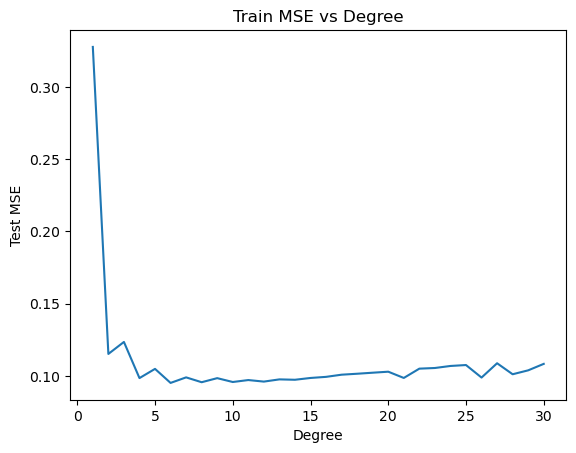

In [12]:
# Assume X_train, y_train, X_test, y_test are already defined
degrees = np.linspace(1, 30, 30).astype(int)
print(degrees)
results = {}

# Iterate over each degree
for k in degrees:
    model = LinearRegression(degree=k, learning_rate=0.01, max_iter=10000,lamda = 0.1,regularization='L1')
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = model.mse(y_train, y_pred_train)
    test_mse = model.mse(y_test, y_pred_test)
    
    train_std_dev = model.std_dev(y_train, y_pred_train)
    test_std_dev = model.std_dev(y_test, y_pred_test)
    
    train_variance = model.variance(y_train, y_pred_train)
    test_variance = model.variance(y_test, y_pred_test)
    
    print(f"Degree {k}:")
    print(f"Train MSE: {train_mse}, Train Std Dev: {train_std_dev}, Train Variance: {train_variance}")
    print(f"Test MSE: {test_mse}, Test Std Dev: {test_std_dev}, Test Variance: {test_variance}\n")
    
    results[k] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_std_dev': train_std_dev,
        'test_std_dev': test_std_dev,
        'train_variance': train_variance,
        'test_variance': test_variance
    }

# Find the best degree that minimizes the test MSE
best_k = min(results, key=lambda k: results[k]['test_mse'])
print(f"Best degree with minimum test MSE: {best_k}")

plt.plot(degrees, [results[k]['test_mse'] for k in degrees])  
plt.xlabel('Degree')  
plt.ylabel('Test MSE')  
plt.title('Train MSE vs Degree')  
plt.show()

Early stopping at iteration 723


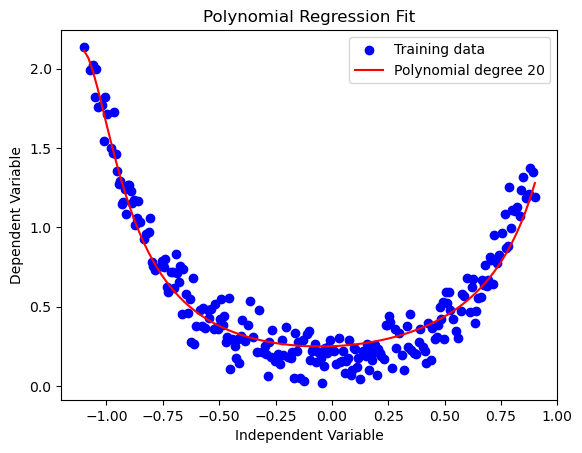

In [9]:
degree = 20
model = LinearRegression(degree=degree, learning_rate=0.01, max_iter=10000)  
model.fit(X_train, y_train)  
  
X_fit = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)  
y_fit = model.predict(X_fit)  
  
plt.scatter(X_train, y_train, color='blue', label='Training data')  
plt.plot(X_fit, y_fit, color='red', label=f'Polynomial degree {degree}')  
plt.xlabel('Independent Variable')  
plt.ylabel('Dependent Variable')  
plt.title('Polynomial Regression Fit')  
plt.legend()  
plt.show()

Early stopping at iteration 789


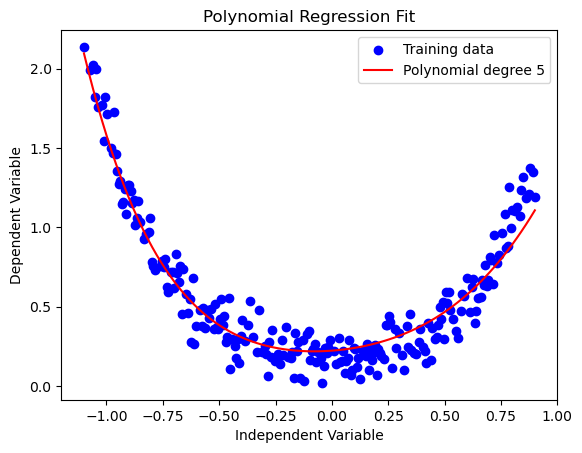

In [10]:
degree = 5
model = LinearRegression(degree=degree, learning_rate=0.01, max_iter=10000)  
model.fit(X_train, y_train)  
  
X_fit = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)  
y_fit = model.predict(X_fit)  
  
plt.scatter(X_train, y_train, color='blue', label='Training data')  
plt.plot(X_fit, y_fit, color='red', label=f'Polynomial degree {degree}')  
plt.xlabel('Independent Variable')  
plt.ylabel('Dependent Variable')  
plt.title('Polynomial Regression Fit')  
plt.legend()  
plt.show()

Early stopping at iteration 196
Early stopping at iteration 212
Early stopping at iteration 167
Early stopping at iteration 178
Early stopping at iteration 179
Early stopping at iteration 1492
Early stopping at iteration 179
Early stopping at iteration 924
Early stopping at iteration 893
Early stopping at iteration 123
Early stopping at iteration 171
Early stopping at iteration 176
Early stopping at iteration 178
Early stopping at iteration 817
Early stopping at iteration 876
Early stopping at iteration 122
Early stopping at iteration 170
Early stopping at iteration 2350
Early stopping at iteration 175
Early stopping at iteration 178
Early stopping at iteration 489
Early stopping at iteration 716
Early stopping at iteration 133
Early stopping at iteration 114
Early stopping at iteration 510
Early stopping at iteration 166
Early stopping at iteration 1224
Early stopping at iteration 173
Early stopping at iteration 5226
Early stopping at iteration 177
Early stopping at iteration 425
Earl

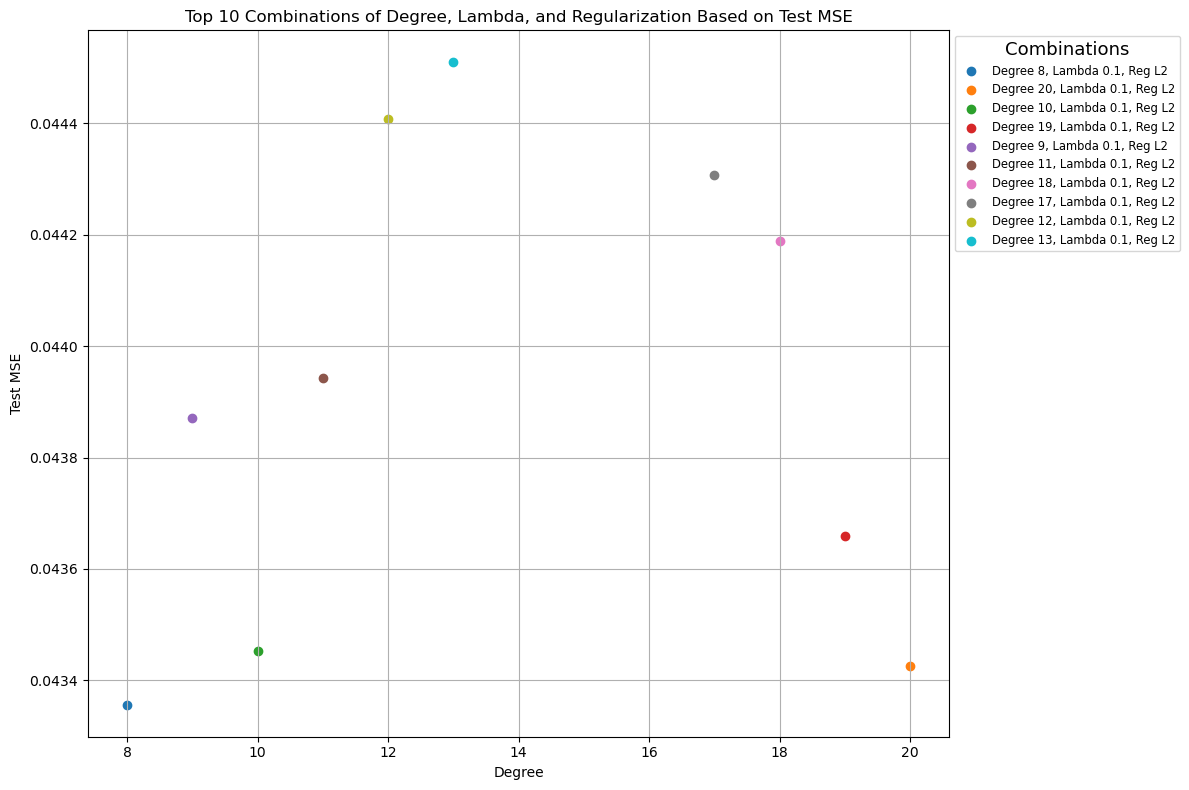

In [22]:
import numpy as np
import matplotlib.pyplot as plt

degrees = np.linspace(1, 20, 20).astype(int)
lambdas = [0.1, 1, 10, 20, 50]
regularizations = ['L1', 'L2']

results = {}

for k in degrees:
    for lamda in lambdas:
        for regularization in regularizations:
            model = LinearRegression(degree=k, learning_rate=0.01, max_iter=10000, lamda=lamda, regularization=regularization)
            model.fit(X_train, y_train)
            
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            train_mse = model.mse(y_train, y_pred_train)
            test_mse = model.mse(y_test, y_pred_test)
            
            train_std_dev = model.std_dev(y_train, y_pred_train)
            test_std_dev = model.std_dev(y_test, y_pred_test)
            
            train_variance = model.variance(y_train, y_pred_train)
            test_variance = model.variance(y_test, y_pred_test)
            
            results[(k, lamda, regularization)] = {
                'train_mse': train_mse,
                'test_mse': test_mse,
                'train_std_dev': train_std_dev,
                'test_std_dev': test_std_dev,
                'train_variance': train_variance,
                'test_variance': test_variance
            }

top_10_combinations = sorted(results.items(), key=lambda item: item[1]['test_mse'])[:10]

print('')
print('Top 10 Combinations of Degree, Lambda, and Regularization Based on Test MSE:')

for params, metrics in top_10_combinations:
    k, lamda, regularization = params
    print(f"Degree {k}, Lambda {lamda}, Regularization {regularization}:")
    print(f"Train MSE: {metrics['train_mse']}, Train Std Dev: {metrics['train_std_dev']}, Train Variance: {metrics['train_variance']}")
    print(f"Test MSE: {metrics['test_mse']}, Test Std Dev: {metrics['test_std_dev']}, Test Variance: {metrics['test_variance']}\n")

plt.figure(figsize=(12, 8))

for params, metrics in top_10_combinations:
    k, lamda, regularization = params
    plt.scatter(k, metrics['test_mse'], label=f'Degree {k}, Lambda {lamda}, Reg {regularization}')

plt.xlabel('Degree')
plt.ylabel('Test MSE')
plt.title('Top 10 Combinations of Degree, Lambda, and Regularization Based on Test MSE')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title='Combinations', title_fontsize='13')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

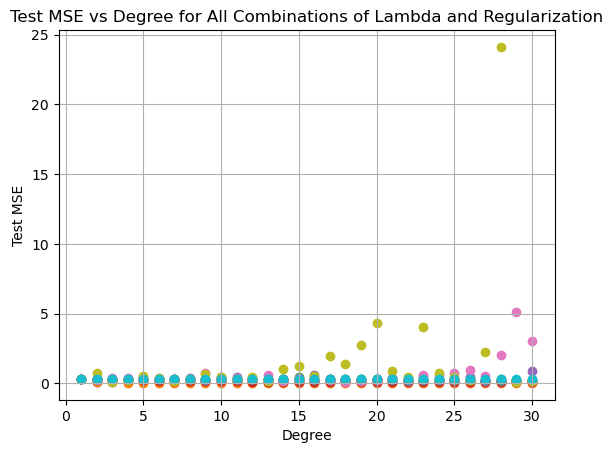

In [20]:
for (k, lamda, regularization), metrics in results.items():
    plt.scatter(k, metrics['test_mse'], label=f'Degree {k}, Lambda {lamda}, Regularization {regularization}')

plt.xlabel('Degree')
plt.ylabel('Test MSE')
plt.title('Test MSE vs Degree for All Combinations of Lambda and Regularization')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title='Combinations', title_fontsize='13')
plt.grid(True)
plt.show()